# **Project Title :  Glass Prediction**

AUTHOR : **Asiedu Henry Kwasi** 

# **Importing Libraries**

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

#Normalize Data
from sklearn.preprocessing import StandardScaler

#Conert Categorical to Numerical Value
from sklearn.preprocessing import LabelEncoder

#Columns Relationship for target value
from sklearn.feature_selection import mutual_info_regression

#Splitting Data
from sklearn.model_selection import train_test_split,cross_val_score

#PCA
from sklearn.decomposition import PCA

#Model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier


#Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


# **Load Dataset**

In [75]:
df = pd.read_csv(".\datasets\glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [62]:
df.shape

(214, 10)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [64]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# **Univariate Analysis**

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


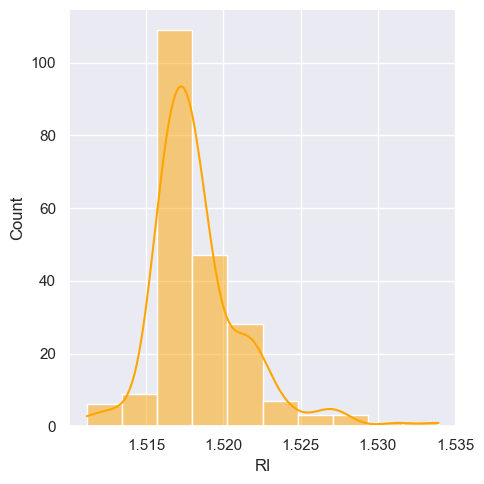

In [9]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["RI"], kde=True, color="orange", bins=10)

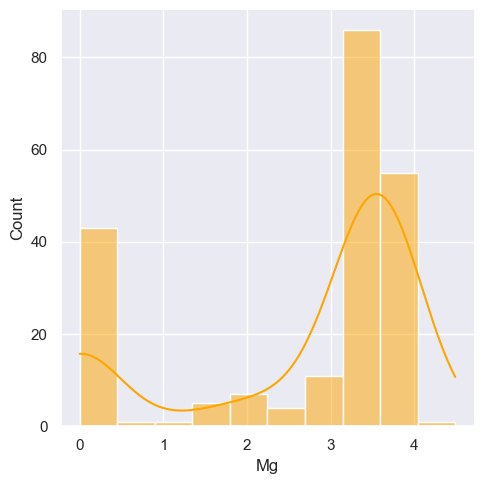

In [10]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["Mg"], kde=True, color="orange", bins=10)

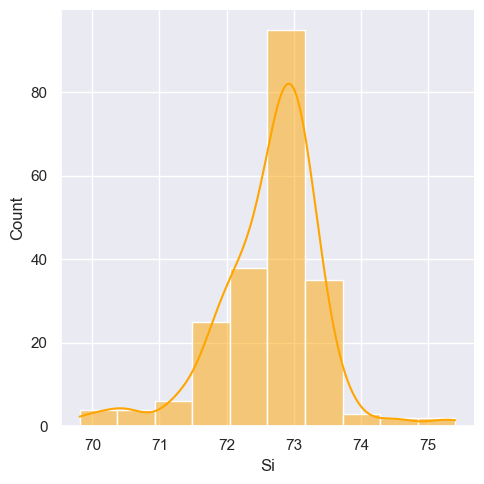

In [11]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["Si"], kde=True, color="orange", bins=10)

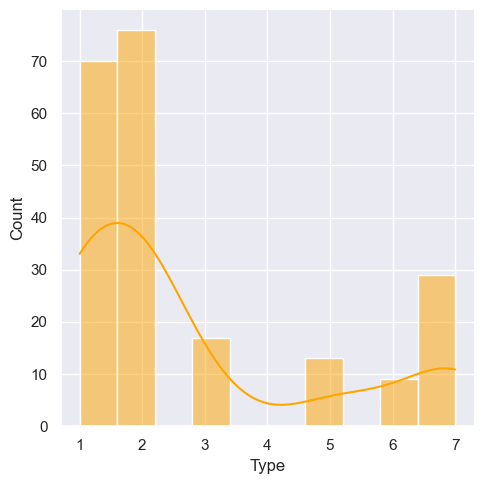

In [12]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["Type"], kde=True, color="orange", bins=10)

# **EDA (Exploratory Data Analysis)**

#### **Remove Duplicate**

In [66]:
df.duplicated().sum()

1

In [77]:
df.drop_duplicates(inplace=True)

In [78]:
df.duplicated().sum()

0

#### **Check And Remove NaN Values**

In [70]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

#### **Remove Outlier**

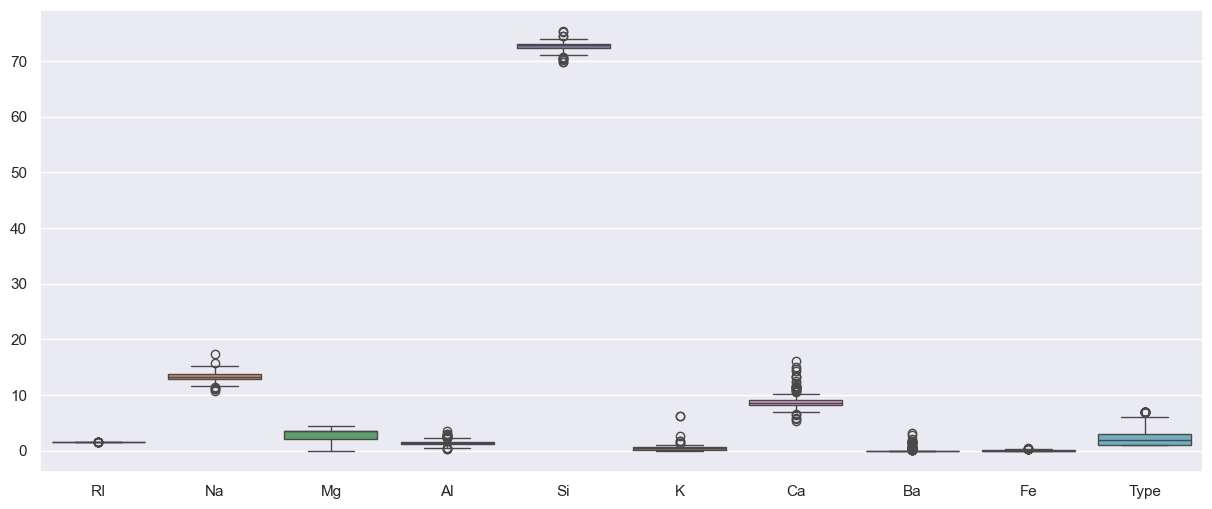

In [71]:
#Check Outliers
num_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15,6))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

In [23]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [79]:
for i in df.columns:
  lower_range,upper_range = remove_outlier(df[i])
  df[i] = np.where(df[i] > upper_range, upper_range, df[i])
  df[i] = np.where(df[i] < lower_range, lower_range, df[i])

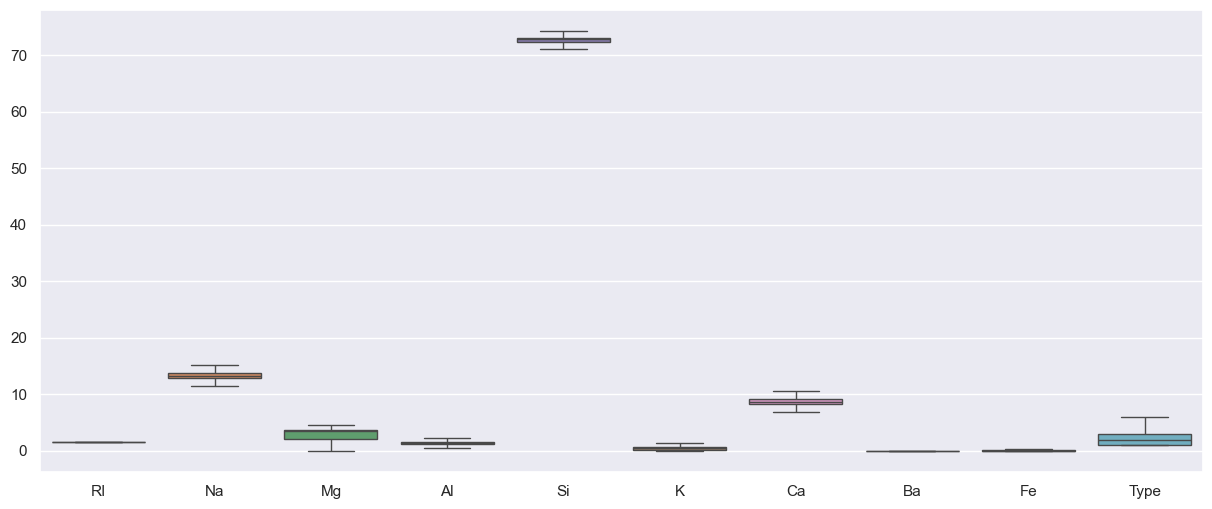

In [80]:
#Check Outliers
num_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15,6))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

#### **Bivariat Analysis**

<Figure size 1000x600 with 0 Axes>

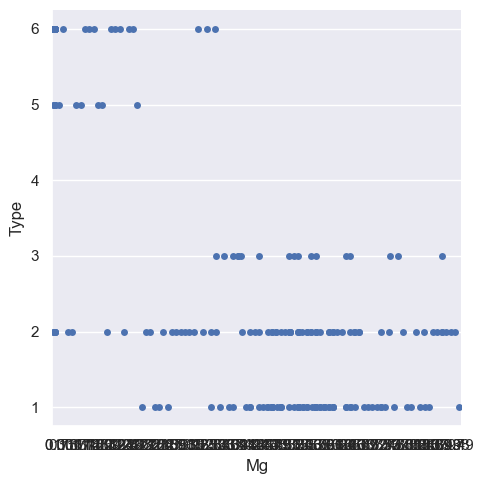

In [81]:
plt.figure(figsize=(10,6))
sns.catplot(x="Mg", y="Type", data=df)
plt.show()

<Figure size 1000x600 with 0 Axes>

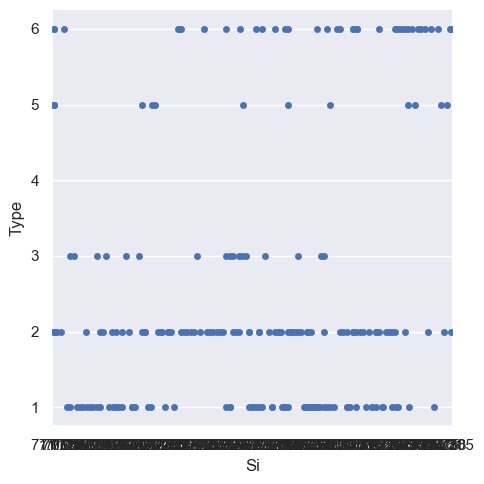

In [83]:
plt.figure(figsize=(10,6))
sns.catplot(x="Si", y="Type", data=df)
plt.show()

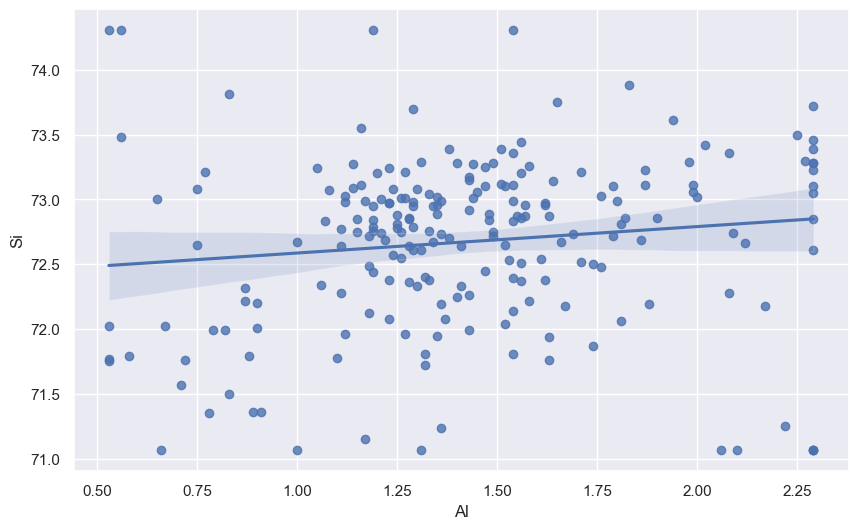

In [29]:
plt.figure(figsize=(10,6))
sns.regplot(x="Al", y="Si", data=df)
plt.show()

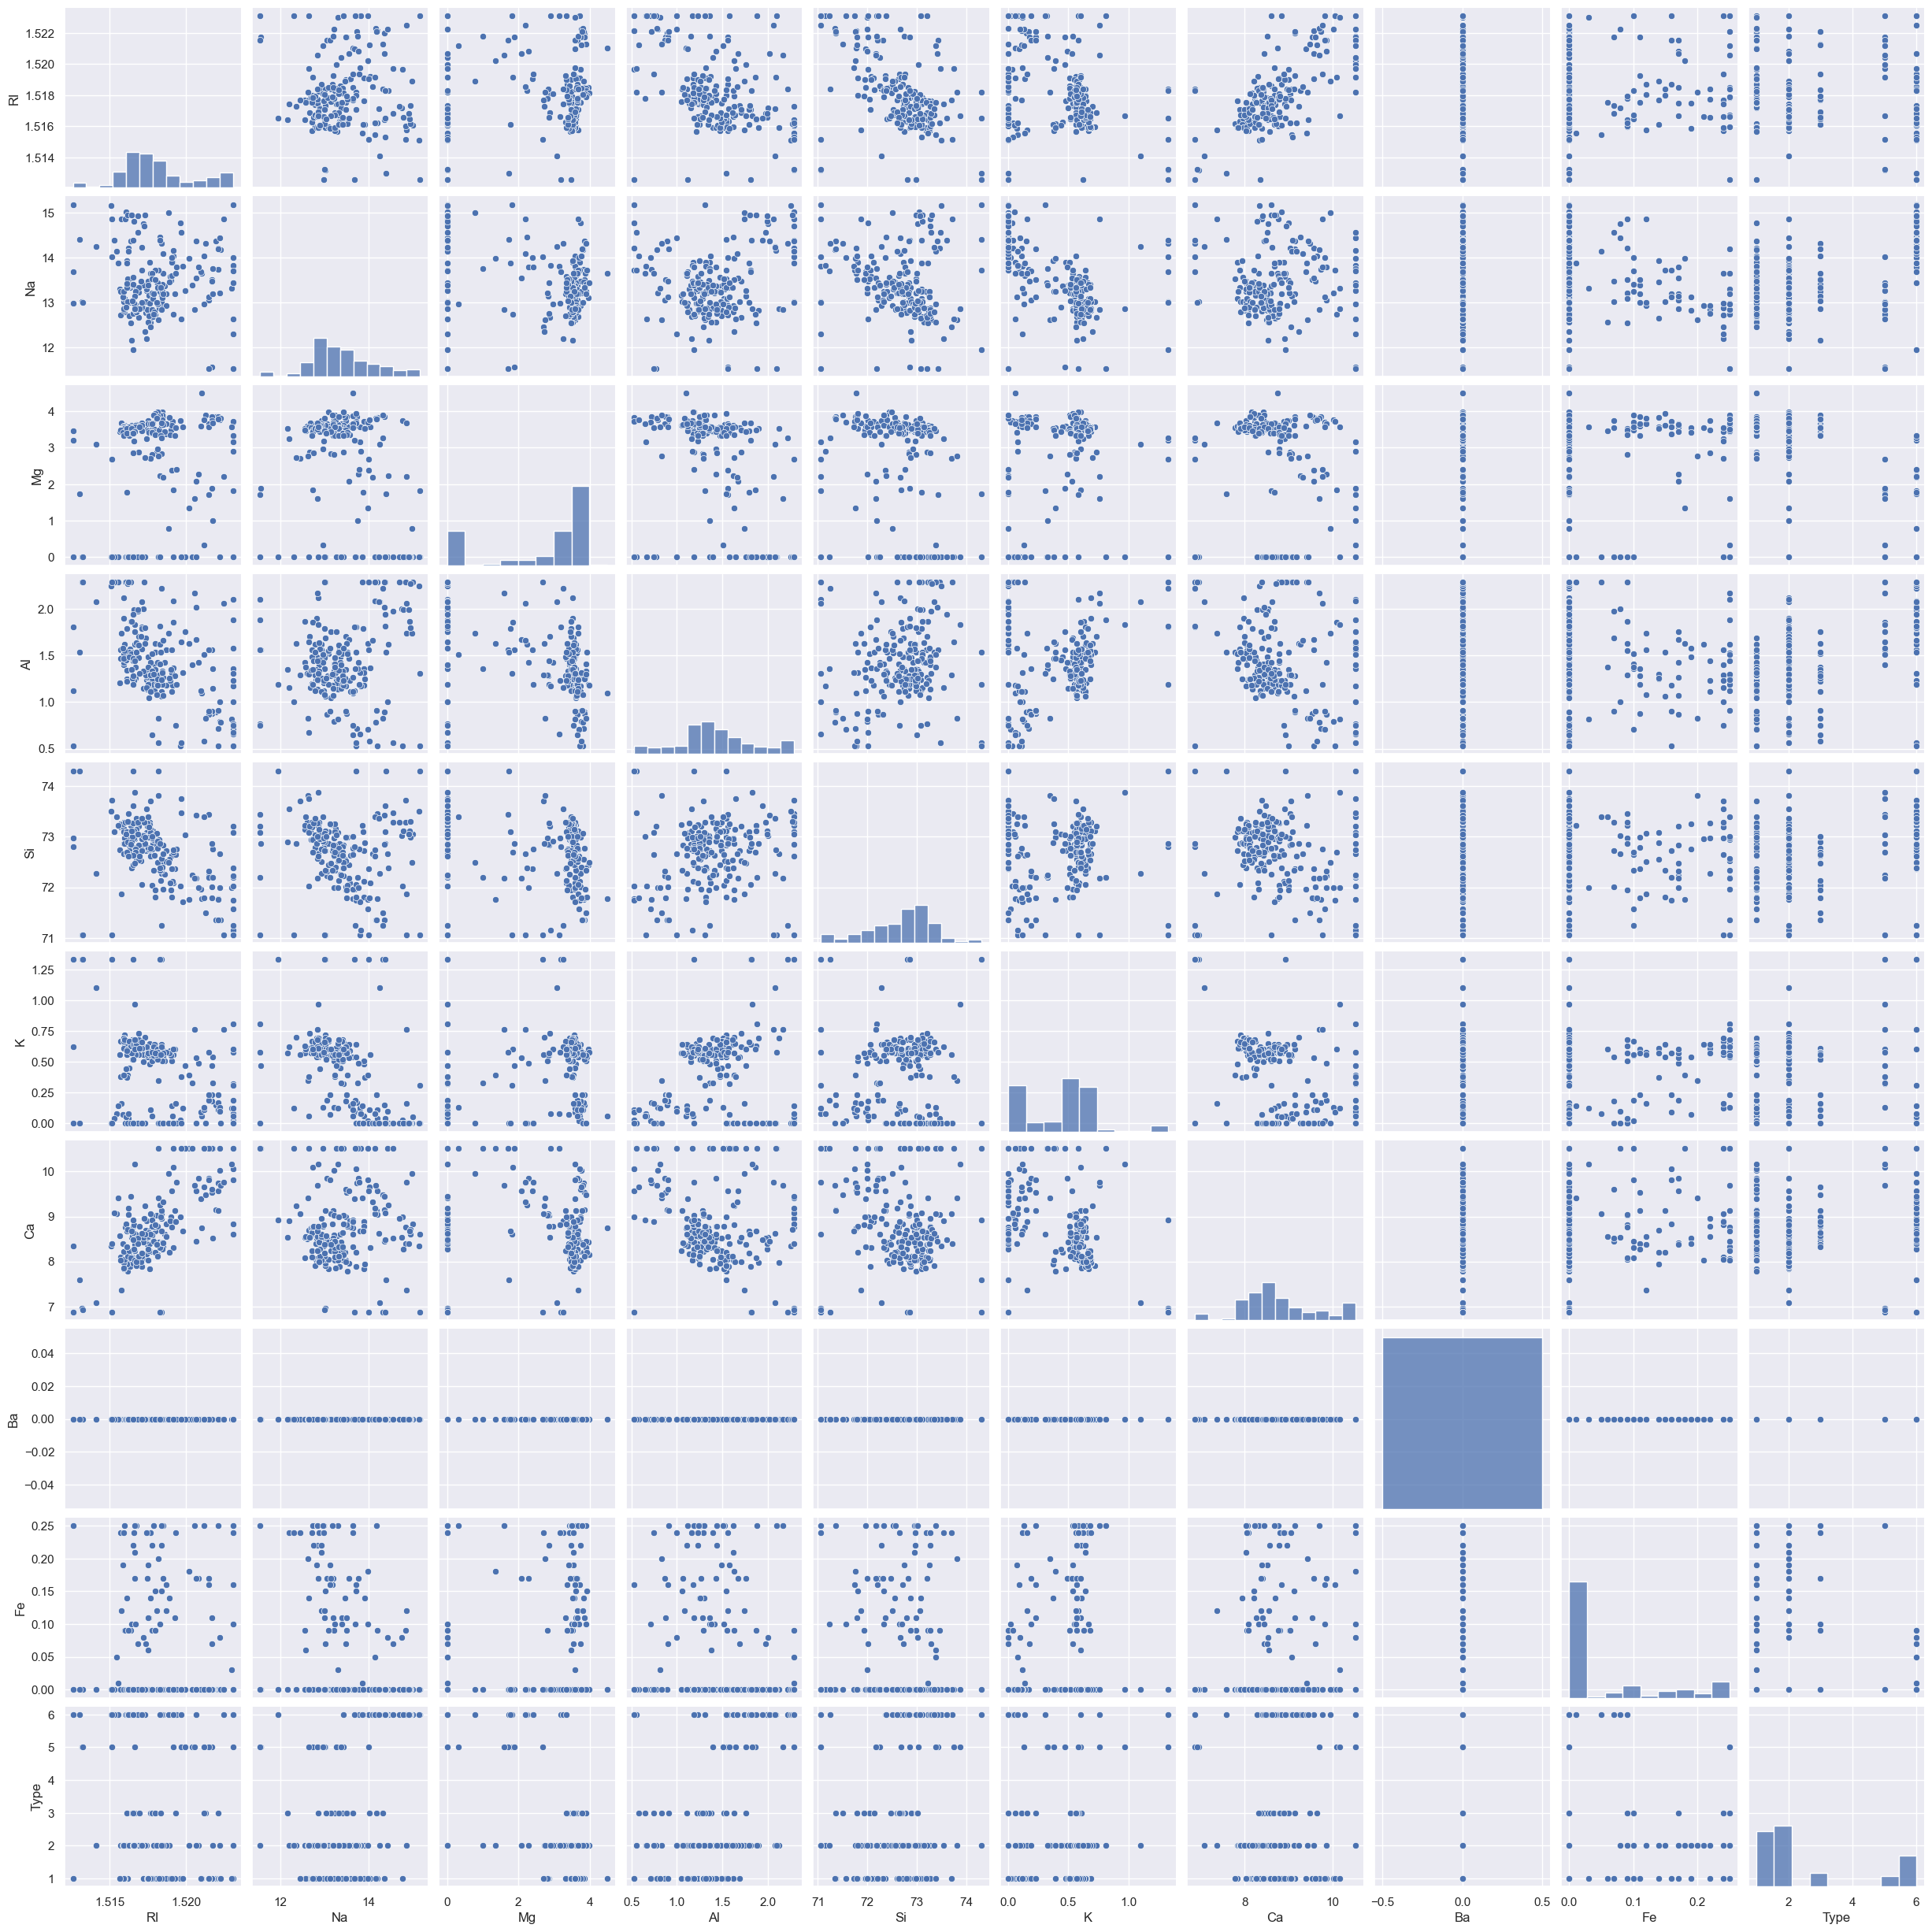

In [30]:
sns.pairplot(df)
plt.show()

<Axes: >

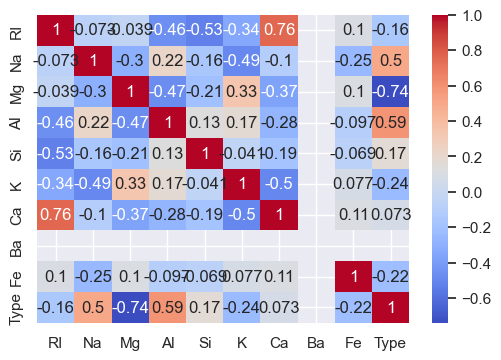

In [31]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<ipython-input-88-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


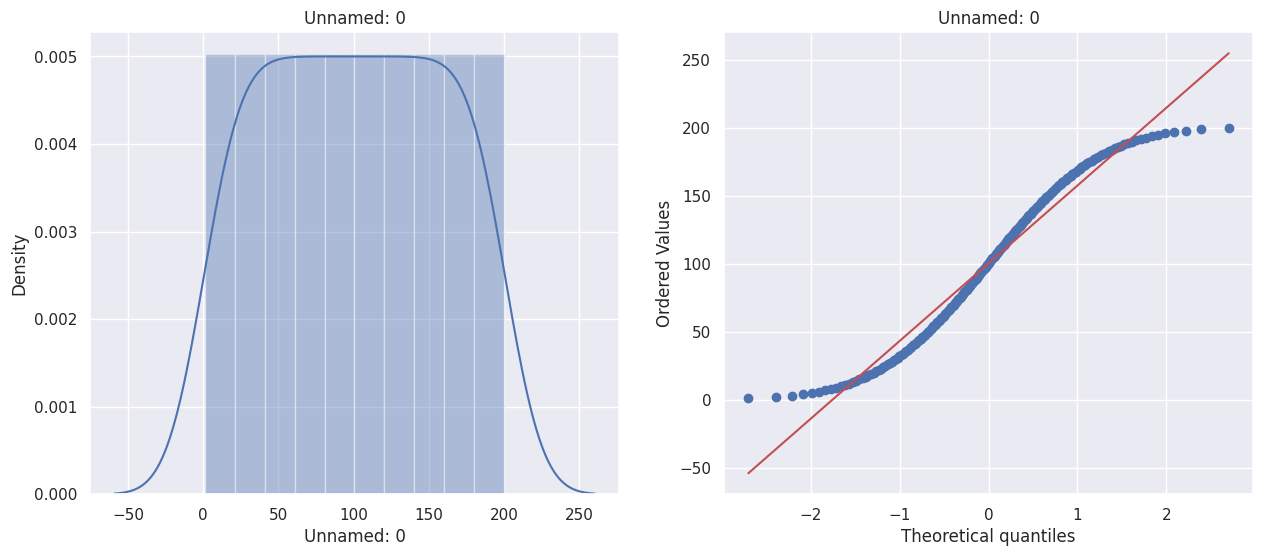

<ipython-input-88-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


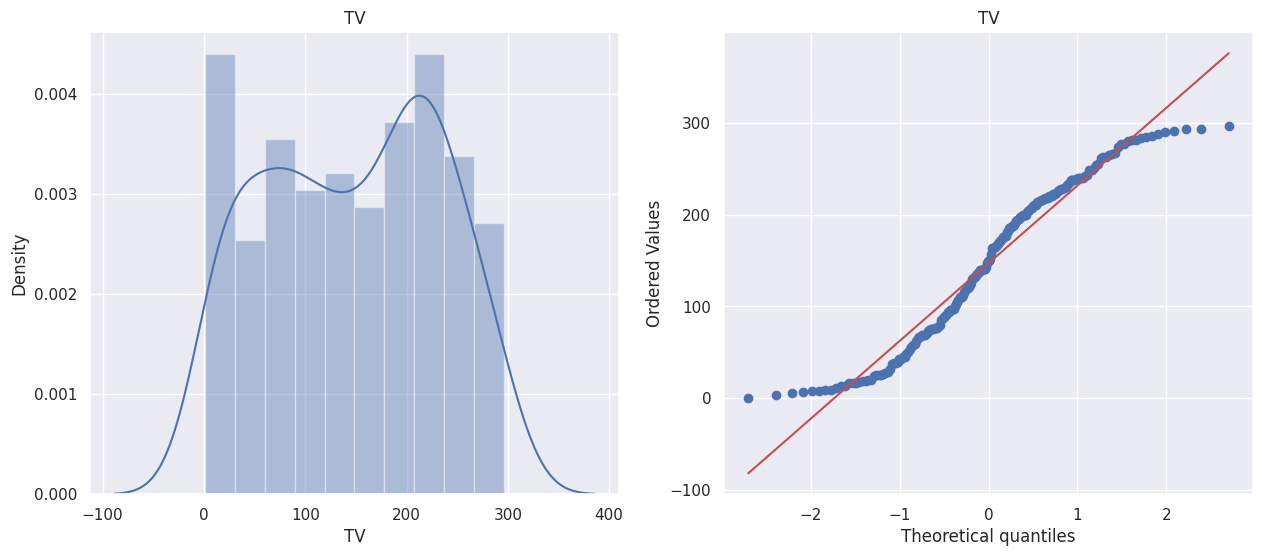

<ipython-input-88-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


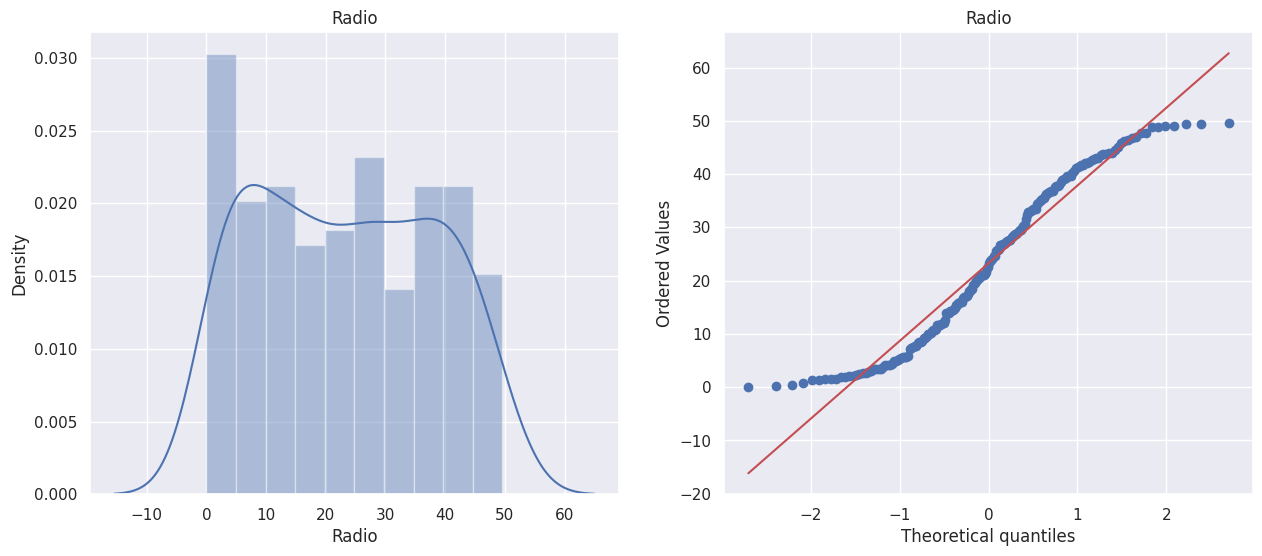

<ipython-input-88-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


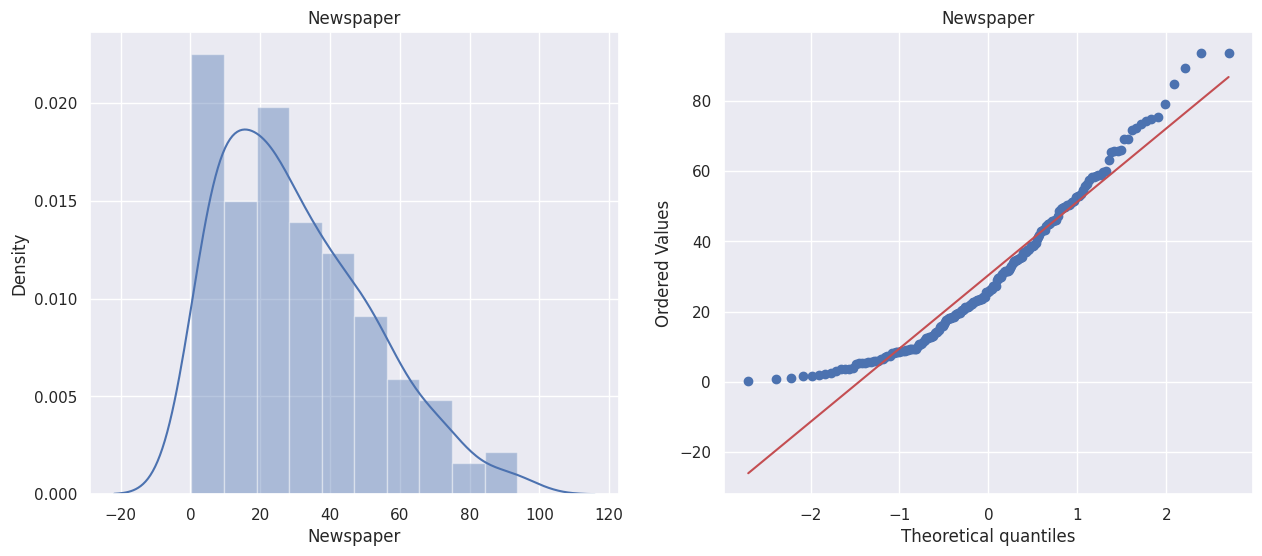

<ipython-input-88-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


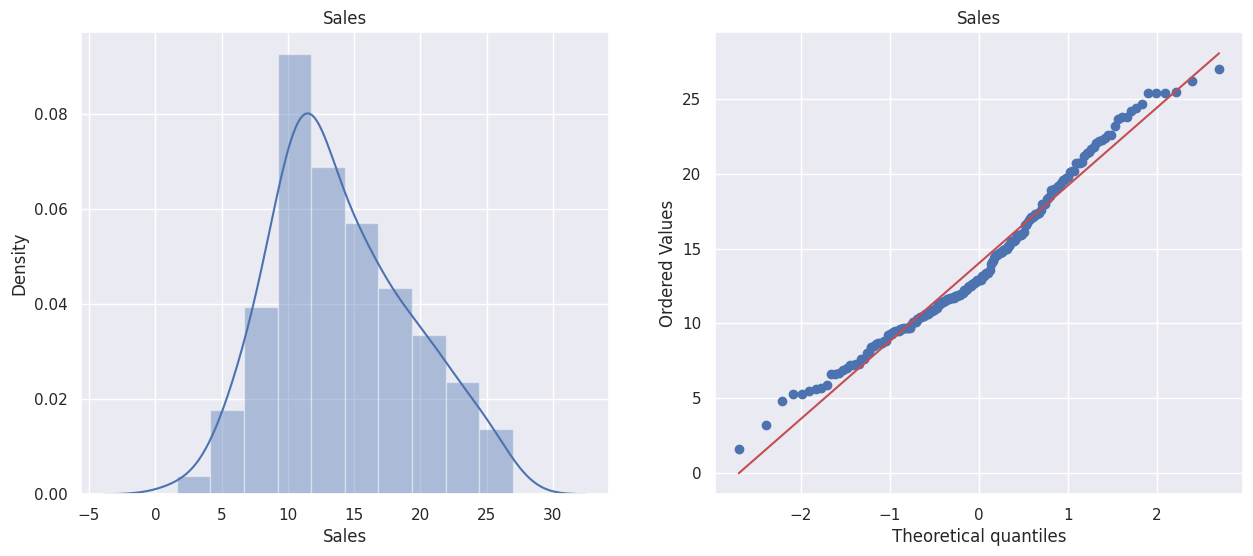

In [88]:
def plots(num_cols, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    #num_cols[variable].hist()
    sns.distplot(num_cols[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(num_cols[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
for i in df.columns:
  plots(df, i)

# **Feature Engineering**

#### **Mutual Information**

In [84]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [85]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [86]:
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
209    6.0
210    6.0
211    6.0
212    6.0
213    6.0
Name: Type, Length: 213, dtype: float64

In [37]:
mi_score = mutual_info_regression(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

Ba    0.035861
Fe    0.099974
Si    0.116059
Ca    0.277297
RI    0.291686
Na    0.294514
Al    0.332452
K     0.350695
Mg    0.417403
dtype: float64

<Axes: >

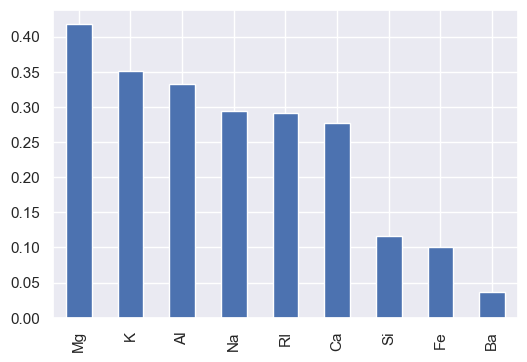

In [38]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(6, 4))

In [88]:
X = X[["Mg","K"]]
Y = LabelEncoder().fit_transform(Y)

In [92]:
Y.shape

(213,)

#### **Splitting Data Into Train and Test**

In [93]:
train_data,test_data,train_label,test_label = train_test_split(X,Y,test_size=0.2,random_state=0)

In [94]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (170, 2)
train_label :  (170,)
test_data :  (43, 2)
test_label :  (43,)


#### **Normalizing Data**

In [95]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [96]:
train_data_sc.shape

(170, 2)

# **Model**

#### **Linear Regression**

In [97]:
model_lr = LogisticRegression().fit(train_data_sc,train_label)

In [99]:
model_lr.score(train_data_sc,train_label)

0.5058823529411764

In [100]:
y_pred = model_lr.predict(test_data_sc)
y_pred

array([4, 1, 0, 4, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 4, 1, 1, 1, 1, 4, 4,
       4, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 4, 4, 1, 1],
      dtype=int64)

In [47]:
print("Mean Absolute Error : ",mean_absolute_error(y_pred,test_label))
print("Mean Squared Error : ",mean_squared_error(y_pred,test_label))
print("R2_Score : ",r2_score(y_pred,test_label))

Mean Absolute Error :  0.7940087878534376
Mean Squared Error :  1.083087047318784
R2_Score :  0.3781569497987086


In [48]:
print(" Train Data Cross_val_score : ",cross_val_score(model_lr,train_data_sc,train_label,cv=5).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_lr,test_data_sc,test_label,cv=5).mean())

 Train Data Cross_val_score :  0.19781826806785247
Test Data Cross_val_score :  0.15958594087119693


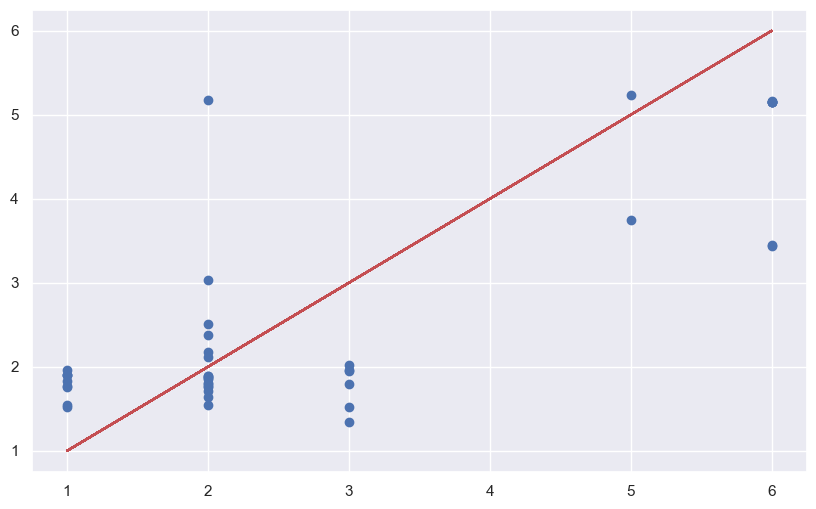

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(test_label,y_pred)
plt.plot(test_label,test_label,'r')

#### **Random Forest Model**

In [50]:
model_rf = RandomForestRegressor().fit(train_data_sc,train_label)

In [51]:
y_pred_2 = model_rf.predict(test_data_sc)

In [52]:
print("Mean Absolute Error : ",mean_absolute_error(y_pred_2,test_label))
print("Mean Squared Error : ",mean_squared_error(y_pred_2,test_label))
print("R2_Score : ",r2_score(y_pred_2,test_label))

Mean Absolute Error :  0.778794608326336
Mean Squared Error :  1.0954475414375495
R2_Score :  0.5220047983357694


In [53]:
print(" Train Data Cross_val_score : ",cross_val_score(model_rf,train_data_sc,train_label,cv=5).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_rf,test_data_sc,test_label,cv=5).mean())

 Train Data Cross_val_score :  0.2723020888268969
Test Data Cross_val_score :  -0.04240957907298604


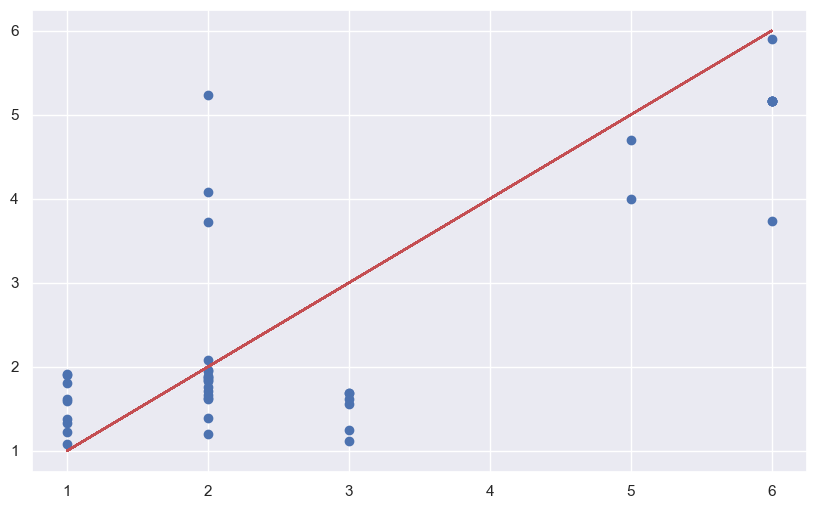

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(test_label,y_pred_2)
plt.plot(test_label,test_label,'r')

#### **Decision Tree Model**

In [55]:
model_tree = DecisionTreeRegressor().fit(train_data_sc,train_label)

In [56]:
y_pred_3 = model_tree.predict(test_data_sc)

In [57]:
print("Mean Absolute Error : ",mean_absolute_error(y_pred_3,test_label))
print("Mean Squared Error : ",mean_squared_error(y_pred_3,test_label))
print("R2_Score : ",r2_score(y_pred_3,test_label))

Mean Absolute Error :  0.7093023255813954
Mean Squared Error :  1.4738372093023255
R2_Score :  0.48678170390075093


In [58]:
print(" Train Data Cross_val_score : ",cross_val_score(model_tree,train_data_sc,train_label,cv=5).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_tree,test_data_sc,test_label,cv=5).mean())

 Train Data Cross_val_score :  -0.11267256283041464
Test Data Cross_val_score :  0.21639716579768953


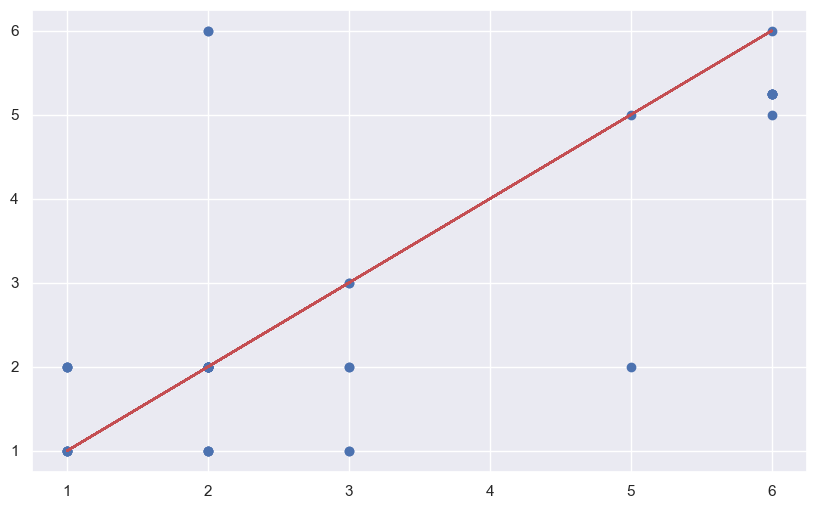

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(test_label,y_pred_3)
plt.plot(test_label,test_label,'r')